# Import and stuff

In [66]:
import pandas as pd
from matplotlib import pyplot as plt
import json
import os

In [67]:
white_list = [] # White

with open("Extended_white_list.json", 'r') as file:
    file_parsed = json.load(file)
    for case in file_parsed:
        file_name = case["file_name"]
        white_list.append(file_name)

# OS Analisys

In [68]:
from pathlib import Path


OG_PATH = "/Users/martinagiannasi/Desktop/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata"

p = Path(OG_PATH)
dirs = [x for x in p.iterdir() if x.is_dir()]
# dirs = [f for f in os.listdir(OG_PATH) if os.path.isdir(f)]
print(dirs)


[PosixPath('/Users/martinagiannasi/Desktop/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/e6caaf6a-62e0-41dd-bbf0-b801bff31956'), PosixPath('/Users/martinagiannasi/Desktop/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/46eac4a8-40d5-480d-baad-290199e5e0c3'), PosixPath('/Users/martinagiannasi/Desktop/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/42cdfad8-9697-4860-8b6b-e5ef16ec9853'), PosixPath('/Users/martinagiannasi/Desktop/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/082ecc9f-1a18-443c-bb37-ae1d45b1108e'), PosixPath('/Users/martinagiannasi/Desktop/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/420cdc7a-c96a-4b3a-b406-680b56d7f78b'), PosixPath('/Users/martinagiannasi/Desktop/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/c8236879-bd77-4968-a741-40b9ecd832f6'), PosixPath('/Users/martinagiannasi/Desktop/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-

In [69]:
import re
r = re.compile('.*.xml')

file_name_dict = {}

for dir in dirs:
    file_name_list = [x for x in dir.iterdir() if r.match(str(x))]
    if len(file_name_list) == 1:
        file_name = file_name_list[0]
        # print(file_name)

        # dir_name = str(dir).split("/")[-1]
        relative_file_name = str(file_name).split("/")[-1]
        # print(relative_file_name)
        # print(dir_name)
        file_name_dict[relative_file_name] = str(file_name)
        # print(file_name)

print(file_name_dict)


{'nationwidechildrens.org_clinical.TCGA-13-0886.xml': '/Users/martinagiannasi/Desktop/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/e6caaf6a-62e0-41dd-bbf0-b801bff31956/nationwidechildrens.org_clinical.TCGA-13-0886.xml', 'nationwidechildrens.org_clinical.TCGA-04-1335.xml': '/Users/martinagiannasi/Desktop/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/46eac4a8-40d5-480d-baad-290199e5e0c3/nationwidechildrens.org_clinical.TCGA-04-1335.xml', 'nationwidechildrens.org_clinical.TCGA-13-1481.xml': '/Users/martinagiannasi/Desktop/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/42cdfad8-9697-4860-8b6b-e5ef16ec9853/nationwidechildrens.org_clinical.TCGA-13-1481.xml', 'nationwidechildrens.org_clinical.TCGA-13-1501.xml': '/Users/martinagiannasi/Desktop/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/082ecc9f-1a18-443c-bb37-ae1d45b1108e/nationwidechildrens.org_clinical.TCGA-13-1501.xml', 'nationwidechildrens.org_clinic

In [70]:
len(file_name_list)

1

In [71]:
print(file_name_dict.keys())

dict_keys(['nationwidechildrens.org_clinical.TCGA-13-0886.xml', 'nationwidechildrens.org_clinical.TCGA-04-1335.xml', 'nationwidechildrens.org_clinical.TCGA-13-1481.xml', 'nationwidechildrens.org_clinical.TCGA-13-1501.xml', 'nationwidechildrens.org_clinical.TCGA-61-1899.xml', 'nationwidechildrens.org_clinical.TCGA-59-2350.xml', 'nationwidechildrens.org_clinical.TCGA-31-1944.xml', 'nationwidechildrens.org_clinical.TCGA-13-1412.xml', 'nationwidechildrens.org_clinical.TCGA-61-1743.xml', 'nationwidechildrens.org_clinical.TCGA-13-0727.xml', 'nationwidechildrens.org_clinical.TCGA-23-2643.xml', 'nationwidechildrens.org_clinical.TCGA-24-1842.xml', 'nationwidechildrens.org_clinical.TCGA-24-1422.xml', 'nationwidechildrens.org_clinical.TCGA-04-1343.xml', 'nationwidechildrens.org_clinical.TCGA-25-1322.xml', 'nationwidechildrens.org_clinical.TCGA-29-1762.xml', 'nationwidechildrens.org_clinical.TCGA-13-1408.xml', 'nationwidechildrens.org_clinical.TCGA-25-1870.xml', 'nationwidechildrens.org_clinical.T

In [72]:
import xml.etree.ElementTree as ET

dead_list = []
alive_list = []

for file_name in white_list:
    # print(file_name)
    complete_path = file_name_dict[file_name]

    tree = ET.parse(complete_path)
    root = tree.getroot()

    namespaces = {
        'admin': 'http://tcga.nci/bcr/xml/administration/2.7',
        'ov': 'http://tcga.nci/bcr/xml/clinical/ov/2.7',
        'clin_shared': "http://tcga.nci/bcr/xml/clinical/shared/2.7"
    }
    # print(root.findall('.//clin_shared:days_to_death',namespaces)[0].text)
    # print(root.findall('.//clin_shared:days_to_birth',namespaces)[0].text)
    # print(root.findall('.//clin_shared:days_to_death',namespaces)[0].text)
    # print(root.findall('.//clin_shared:days_to_last_followup',namespaces)[0].text)
    Days_to_death = root.findall('.//clin_shared:days_to_death',namespaces)[0].text
    Days_to_last_followup = root.findall('.//clin_shared:days_to_last_followup',namespaces)[0].text

    if not Days_to_death == None:
        # Dead.
        dead_list.append(Days_to_death)
    elif not Days_to_last_followup == None:
        # Alive.
        alive_list.append(Days_to_last_followup)





In [73]:
print(dead_list)

['506', '1106', '1583', '2742', '820', '336', '1024', '1933', '304', '455', '1946', '1329', '1688', '3337', '1102', '479', '885', '1955', '515', '1446', '976', '608', '1091', '1646', '31', '31', '737', '1767', '1249', '731', '1018', '1369', '676', '3622', '1583', '663', '1059', '9', '1446', '1266', '1189', '2400', '701', '1451', '346', '1769', '565', '637', '74', '962', '528', '728', '695', '1024', '1104', '1082', '1187', '189', '1516', '863', '9', '1123', '197', '286', '636', '1073', '2717', '396', '1354', '462', '1032', '446', '457', '2490', '2154', '1341', '1157', '2648', '4624', '788', '1483', '1380', '24', '1169', '1620', '1470', '949', '1484', '1158', '1757', '1155', '583', '555', '1484', '1278', '1746', '8', '820', '1579', '1199', '1114', '75', '61', '676', '1511', '1354', '2089', '679', '65', '1499', '2634', '1058', '61', '1279', '354', '1579', '1000', '53', '1384', '1562', '1977', '730', '1213', '895', '1089', '11', '1264', '627', '1004', '23', '138', '542', '1229', '3224', '9

Text(0.5, 1.0, 'Days to death hist')

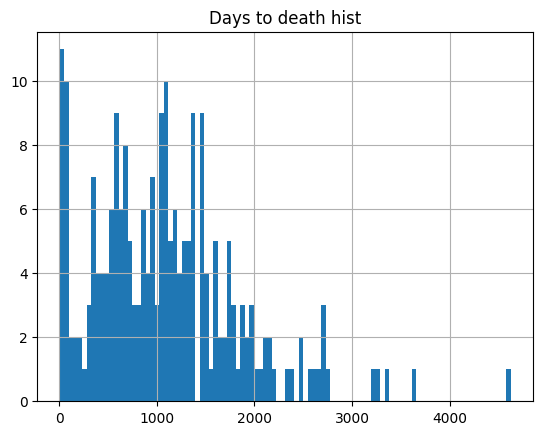

In [74]:
dead = pd.Series([int(d) for d in dead_list])
alive = pd.Series([int(d) for d in alive_list])

import numpy as np

# print(max(dead_list))

# plotting labelled histogram
dead.hist(bins=100)
plt.title("Days to death hist")
# plt.xticks(np.arange(0, 500, step=40))
# plt.xlabel('weight')
# plt.ylabel('Person count')
# plt.show()


Text(0.5, 1.0, 'Days to last followup hist')

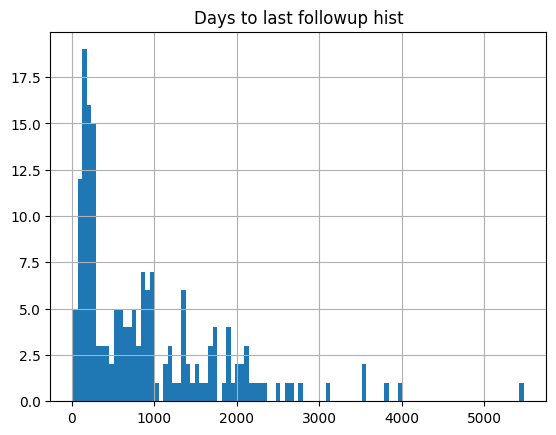

In [75]:
alive.hist(bins=100)
plt.title("Days to last followup hist")

In [76]:
print(f"Dead people: {len(dead_list)}")
print(f"Alive people: {len(alive_list)}")

Dead people: 226
Alive people: 179


(0.0, 730.0)

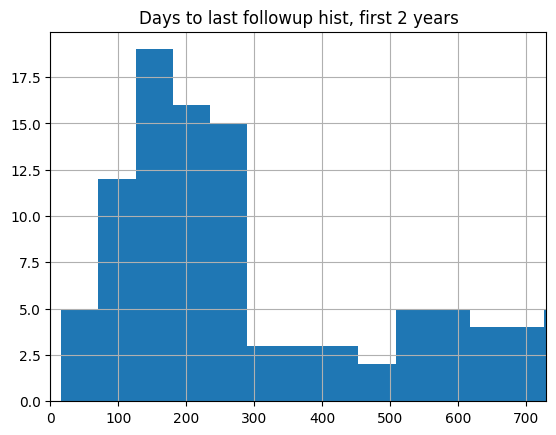

In [83]:
alive.hist(bins=100)
plt.title("Days to last followup hist, first 2 years")
plt.xlim(0, 730) # Focus on the first 2 years

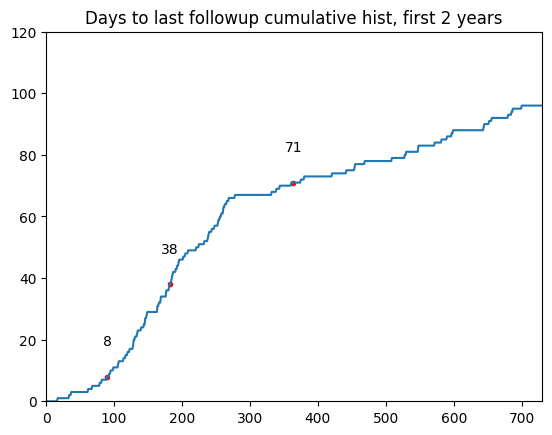

In [78]:
cumulative_value = pd.Series([len([a for a in alive_list if int(a) < i]) for i in range(0, max(alive))])

fig = plt.figure()
ax = fig.add_subplot()

val = [90, 182, 364]
for i in val:
    v = len([a for a in alive_list if int(a) < i])
    ax.text(i, v + 10, "%d" %v, ha="center")
    ax.plot(i, v, '.r')
plt.xlim(0, 730) # Focus on the first 2 years
plt.ylim(0, 120) # Focus on the first 2 years
plt.title("Days to last followup cumulative hist, first 2 years")
plt.plot(cumulative_value)
plt.show()

In [79]:
first_3_month = len([a for a in alive_list if int(a) < 91])
first_6_month = len([a for a in alive_list if int(a) < 183])
first_year = len([a for a in alive_list if int(a) <= 365])
after_year = len([a for a in alive_list if int(a) > 365])
total = len(alive_list)
print(f"Days to last followup")
print(f"Before 3 month total:\t{first_3_month}\t {((first_3_month/total) * 100):.2f}%")
print(f"Before 6 month total:\t{first_6_month}\t {((first_6_month/total) * 100):.2f}%")
print(f"Before 1 years total:\t{first_year}\t {((first_year/total) * 100):.2f}%")
print(f"After 1 years total:\t{after_year}\t {((after_year/total) * 100):.2f}%")

Days to last followup
Before 3 month total:	8	 4.47%
Before 6 month total:	38	 21.23%
Before 1 years total:	71	 39.66%
After 1 years total:	108	 60.34%
